In [ ]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os, shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2) Paths
CSV_PATH      = "/content/drive/MyDrive/data_images/vott-csv-export/sorted_output_file.csv"
IMG_DIR       = "/content/drive/MyDrive/data_images/vott-csv-export"
WORKDIR       = "/content/drive/MyDrive/data_images/yolo_dataset"
TRAIN_IMG_DIR = os.path.join(WORKDIR, "images/train")
VAL_IMG_DIR   = os.path.join(WORKDIR, "images/val")
TRAIN_LBL_DIR = os.path.join(WORKDIR, "labels/train")
VAL_LBL_DIR   = os.path.join(WORKDIR, "labels/val")

In [ ]:
# 3) Create folders
for d in [TRAIN_IMG_DIR, VAL_IMG_DIR, TRAIN_LBL_DIR, VAL_LBL_DIR]:
    os.makedirs(d, exist_ok=True)


In [ ]:
# Load CSV
df = pd.read_csv(CSV_PATH)

In [ ]:
# 5) Build str→int mapping (run once after loading df)
classes = sorted(df['label'].unique())
class_mapping = {c:i for i,c in enumerate(classes)}

In [ ]:
# 6) Converter that uses the mapping (replace your old version)
def convert_to_yolo(row, img_w, img_h):
    xc = (row.xmin + row.xmax) / 2 / img_w
    yc = (row.ymin + row.ymax) / 2 / img_h
    w  = (row.xmax - row.xmin)      / img_w
    h  = (row.ymax - row.ymin)      / img_h
    cls_id = class_mapping[row['label']]    # ← use mapping, not int()
    return f"{cls_id} {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}"

In [ ]:
# 7) Write data.yaml
nc = len(classes)
names = ", ".join(f"'{c}'" for c in classes)
yaml = f"""
path: {WORKDIR}
train: images/train
val:   images/val
nc:    {nc}
names: [{names}]
""".strip()
with open(os.path.join(WORKDIR, 'data.yaml'), 'w') as f:
    f.write(yaml + "\n")

In [ ]:
# 8) Train and capture the Results object

train_results = YOLO('yolov8n.yaml').train(
    data=f"{WORKDIR}/data.yaml",
    epochs=50,
    patience=5,
    imgsz=640,
    batch=16,
    device='cuda',
    name='train_run3'
)

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/data_images/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_run3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, pl

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.8±0.7 ms, read: 0.4±0.2 MB/s, size: 363.4 KB)


train: Scanning /content/drive/MyDrive/data_images/yolo_dataset/labels/train.cache... 213 images, 0 backgrounds, 0 corrupt: 100%|██████████| 213/213 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.3±0.2 MB/s, size: 281.5 KB)


val: Scanning /content/drive/MyDrive/data_images/yolo_dataset/labels/val.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_run3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train_run3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.31G      5.728      4.434      4.449         43        640: 100%|██████████| 14/14 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:41<00:00, 21.00s/it]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.33G      4.302      2.781      3.601         77        640: 100%|██████████| 14/14 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.35G      3.521      2.356      3.056         59        640: 100%|██████████| 14/14 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.35G      3.194      2.084       2.59         92        640: 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.35G      2.995      1.856      2.302         91        640: 100%|██████████| 14/14 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.66G      2.698      1.698      2.062         68        640: 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.66G      2.514      1.556       1.97        127        640: 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         54        450          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.66G      2.427      1.418      1.838         78        640: 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         54        450      0.582      0.133       0.14      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.66G      2.269      1.284      1.696         79        640: 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         54        450      0.521      0.371      0.353      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.66G      2.228      1.278       1.71        104        640: 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         54        450      0.751      0.638      0.686      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.66G      2.142      1.285      1.624         73        640: 100%|██████████| 14/14 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         54        450      0.632      0.614      0.532      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.66G      2.105      1.256      1.623         41        640: 100%|██████████| 14/14 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         54        450      0.809      0.736      0.802      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.66G      2.019      1.137       1.54         70        640: 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         54        450      0.804      0.791      0.844      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.66G      1.996       1.08      1.509         77        640: 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         54        450       0.79      0.756      0.796      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.66G      1.953      1.092      1.501         89        640: 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         54        450      0.829      0.784      0.843       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.66G      1.925      1.048      1.461         91        640: 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         54        450      0.855      0.813      0.879      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.66G      1.901      1.038      1.452         83        640: 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         54        450      0.851      0.815      0.874      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.66G      1.908      1.032      1.481         45        640: 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         54        450      0.857        0.8      0.877      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.66G      1.922      1.027       1.46         96        640: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         54        450       0.84      0.817      0.852      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.66G      1.872     0.9906      1.432         58        640: 100%|██████████| 14/14 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         54        450      0.831      0.852      0.899      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.66G      1.916     0.9928      1.421         84        640: 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         54        450      0.784      0.798      0.822      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.66G      1.832     0.9874        1.4         73        640: 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         54        450      0.831      0.878      0.915      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.66G      1.873     0.9908      1.444         93        640: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         54        450      0.874      0.835      0.908      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.82G      1.866     0.9585      1.387        100        640: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         54        450      0.799      0.856      0.849      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.82G      1.823     0.9936      1.413         57        640: 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         54        450      0.849      0.873      0.912       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.82G      1.807     0.9415       1.38         48        640: 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         54        450      0.869      0.836      0.901      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.84G      1.774     0.9265      1.403         89        640: 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         54        450      0.878      0.851       0.92      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.84G      1.804     0.9591      1.406         56        640: 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         54        450      0.837       0.89      0.919      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.84G      1.773     0.9206      1.344        111        640: 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         54        450      0.867      0.853      0.925      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.84G      1.827      0.902      1.384         60        640: 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         54        450      0.879      0.888      0.928      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.84G      1.826     0.8978      1.344        101        640: 100%|██████████| 14/14 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         54        450      0.861      0.878      0.902      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.84G      1.765     0.8941       1.37         94        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         54        450      0.859      0.881      0.922      0.453
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



32 epochs completed in 0.067 hours.
Optimizer stripped from runs/detect/train_run3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train_run3/weights/best.pt, 6.2MB

Validating runs/detect/train_run3/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         54        450      0.878      0.851       0.92      0.481
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train_run3


In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    for file in files:
        if file.endswith(".pt"):
            print(os.path.join(root, file))


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train_run3/weights/best.pt")

# Run validation
metrics = model.val()

# Extract metrics
precision = metrics.box.p.item()
recall    = metrics.box.r.item()
f1_score  = metrics.box.f1.item()
map50     = metrics.box.map50.item()
map5095   = metrics.box.map.item()

# IoU (approximated from mAP@0.5 if direct IoU not available)
# Note: mAP@0.5 ≈ mean IoU threshold performance, but here we keep as separate metric
iou = map50  # you can also compute real IoU if you access predictions vs. GT

# Dice coefficient (box-level, equivalent to F1 here)
dice = (2 * precision * recall) / (precision + recall + 1e-6)

# Approximate accuracy
accuracy = (precision + recall) / 2

# Display results
print(f"Precision:       {precision * 100:.2f}%")
print(f"Recall:          {recall    * 100:.2f}%")
print(f"F1 Score:        {f1_score  * 100:.2f}%")
print(f"IoU (approx.):   {iou * 100:.2f}%")
print(f"Dice Coefficient:{dice * 100:.2f}%")
print(f"mAP@0.5:         {map50 * 100:.2f}%")
print(f"mAP@0.5:0.95:    {map5095 * 100:.2f}%")
print(f"Approx. Accuracy:{accuracy * 100:.2f}%")


Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 133.9±46.2 MB/s, size: 311.2 KB)


val: Scanning /content/drive/MyDrive/data_images/yolo_dataset/labels/val.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


                   all         54        450      0.874      0.849      0.918      0.479
Speed: 8.6ms preprocess, 15.7ms inference, 0.0ms loss, 9.6ms postprocess per image
Results saved to runs/detect/val
Precision:       87.43%
Recall:          84.89%
F1 Score:        86.14%
IoU (approx.):   91.78%
Dice Coefficient:86.14%
mAP@0.5:         91.78%
mAP@0.5:0.95:    47.89%
Approx. Accuracy:86.16%


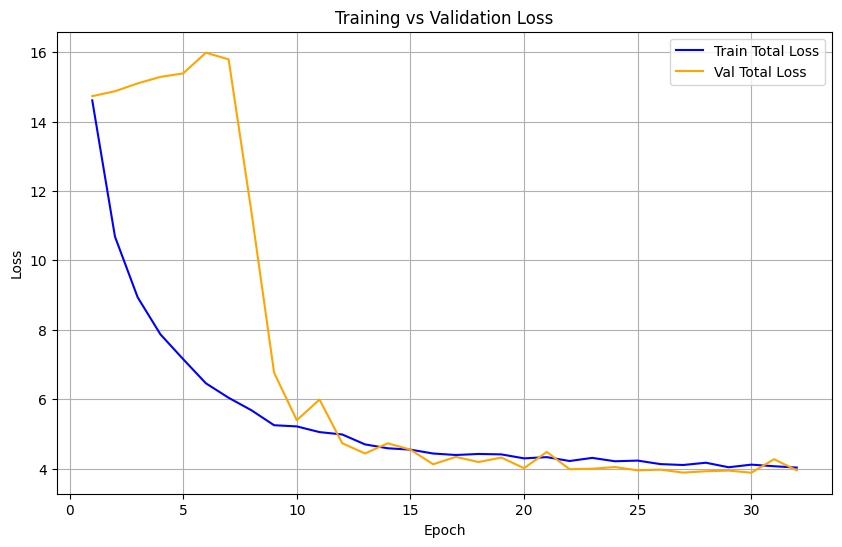

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results
df = pd.read_csv("/content/runs/detect/train_run3/results.csv")

# Compute total losses
df['train_total_loss'] = df['train/box_loss'] + df['train/cls_loss'] + df['train/dfl_loss']
df['val_total_loss'] = df['val/box_loss'] + df['val/cls_loss'] + df['val/dfl_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_total_loss'], label='Train Total Loss', color='blue')
plt.plot(df['epoch'], df['val_total_loss'], label='Val Total Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from ultralytics import YOLO
import pandas as pd
import os
from glob import glob
from tqdm import tqdm

# Load the trained YOLO model (adjust the path to your trained weights)
model = YOLO('/content/runs/detect/train_run3/weights/best.pt')  # Change this path if needed

# Path to the images you want to run inference on
image_folder = '/content/drive/MyDrive/data_images/yolo_dataset/images/train'  # Change this to your actual image directory
image_paths = sorted(glob(os.path.join(image_folder, '*.jpg')))  # Use '*.png' or '*.tif' if needed

# Store detection results
results_list = []

# Run inference on all images
for image_path in tqdm(image_paths, desc="Running inference"):
    image_name = os.path.basename(image_path)

    # Run model
    results = model(image_path)[0]  # First result object

    # Extract bounding boxes: [xmin, ymin, xmax, ymax, confidence, class]
    for box in results.boxes.data.tolist():
        xmin, ymin, xmax, ymax, conf, cls = box
        results_list.append({
            'image': image_name,
            'class_id': int(cls),
            'confidence': round(conf, 4),
            'xmin': int(xmin),
            'ymin': int(ymin),
            'xmax': int(xmax),
            'ymax': int(ymax)
        })

# Convert to a DataFrame
df = pd.DataFrame(results_list)

# Save to CSV
output_csv = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_train_predictions.csv'
df.to_csv(output_csv, index=False)

print(f"Saved results to {output_csv}")


Running inference:   0%|          | 0/213 [00:00<?, ?it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_1.jpg: 384x640 4 sperms, 35.1ms
Speed: 2.3ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   0%|          | 1/213 [00:00<00:45,  4.71it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_10.jpg: 384x640 21 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_101.jpg: 384x640 3 sperms, 13.9ms
Speed: 3.0ms preprocess, 13.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_102.jpg: 384x640 3 sperms, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   2%|▏         | 4/213 [00:00<00:31,  6.55it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_103.jpg: 384x640 3 sperms, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_106.jpg: 384x640 9 sperms, 7.1ms
Speed: 2.0ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_107.jpg: 384x640 9 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_109.jpg: 384x640 5 sperms, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   4%|▍         | 8/213 [00:00<00:15, 13.26it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_11.jpg: 384x640 26 sperms, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_110.jpg: 384x640 3 sperms, 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_111.jpg: 384x640 4 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_112.jpg: 384x640 5 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   6%|▌         | 12/213 [00:00<00:10, 18.49it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_114.jpg: 384x640 10 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_116.jpg: 384x640 12 sperms, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_118.jpg: 384x640 9 sperms, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_120.jpg: 384x640 10 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   8%|▊         | 16/213 [00:00<00:08, 23.33it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_126.jpg: 384x640 9 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_127.jpg: 384x640 12 sperms, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_128.jpg: 384x640 4 sperms, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_130.jpg: 384x640 2 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_131.jpg: 384x640 7 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.5ms postprocess 

Running inference:  10%|▉         | 21/213 [00:01<00:06, 28.19it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_132.jpg: 384x640 5 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_133.jpg: 384x640 8 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_134.jpg: 384x640 8 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_135.jpg: 384x640 4 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  12%|█▏        | 25/213 [00:01<00:06, 31.03it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_136.jpg: 384x640 10 sperms, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_137.jpg: 384x640 6 sperms, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_138.jpg: 384x640 7 sperms, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_139.jpg: 384x640 7 sperms, 6.3ms
Speed: 2.1ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_14.jpg: 384x640 65 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess 

Running inference:  14%|█▍        | 30/213 [00:01<00:05, 34.02it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_140.jpg: 384x640 2 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_141.jpg: 384x640 1 sperm, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_142.jpg: 384x640 4 sperms, 11.5ms
Speed: 3.1ms preprocess, 11.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_143.jpg: 384x640 6 sperms, 7.0ms
Speed: 2.1ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  16%|█▌        | 34/213 [00:01<00:05, 34.39it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_145.jpg: 384x640 10 sperms, 6.1ms
Speed: 2.2ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_146.jpg: 384x640 7 sperms, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_147.jpg: 384x640 14 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_149.jpg: 384x640 6 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  18%|█▊        | 38/213 [00:01<00:04, 35.49it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_15.jpg: 384x640 33 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_150.jpg: 384x640 9 sperms, 7.2ms
Speed: 2.2ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_151.jpg: 384x640 5 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_152.jpg: 384x640 7 sperms, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  20%|█▉        | 42/213 [00:01<00:04, 35.42it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_154.jpg: 384x640 13 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_155.jpg: 384x640 6 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_156.jpg: 384x640 13 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_158.jpg: 384x640 11 sperms, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  22%|██▏       | 46/213 [00:01<00:04, 35.12it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_16.jpg: 384x640 36 sperms, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_160.jpg: 384x640 8 sperms, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_161.jpg: 384x640 9 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_162.jpg: 384x640 6 sperms, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  23%|██▎       | 50/213 [00:01<00:04, 34.41it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_163.jpg: 384x640 2 sperms, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_164.jpg: 384x640 8 sperms, 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_165.jpg: 384x640 9 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_166.jpg: 384x640 7 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  25%|██▌       | 54/213 [00:01<00:04, 34.20it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_167.jpg: 384x640 6 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_168.jpg: 384x640 10 sperms, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_17.jpg: 384x640 29 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_170.jpg: 384x640 8 sperms, 6.9ms
Speed: 2.3ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  27%|██▋       | 58/213 [00:02<00:04, 34.57it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_171.jpg: 384x640 7 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_172.jpg: 384x640 7 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_174.jpg: 384x640 6 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_175.jpg: 384x640 7 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  29%|██▉       | 62/213 [00:02<00:04, 35.52it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_176.jpg: 384x640 7 sperms, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_177.jpg: 384x640 10 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_178.jpg: 384x640 (no detections), 6.5ms
Speed: 2.1ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_179.jpg: 384x640 7 sperms, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  31%|███       | 66/213 [00:02<00:04, 35.80it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_182.jpg: 384x640 3 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_183.jpg: 384x640 3 sperms, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_185.jpg: 384x640 3 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_187.jpg: 384x640 3 sperms, 13.4ms
Speed: 3.3ms preprocess, 13.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  33%|███▎      | 70/213 [00:02<00:04, 33.94it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_188.jpg: 384x640 5 sperms, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_189.jpg: 384x640 3 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_191.jpg: 384x640 3 sperms, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_192.jpg: 384x640 3 sperms, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  35%|███▍      | 74/213 [00:02<00:04, 34.43it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_193.jpg: 384x640 1 sperm, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_196.jpg: 384x640 1 sperm, 8.7ms
Speed: 3.2ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_198.jpg: 384x640 1 sperm, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_2.jpg: 384x640 1 sperm, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  37%|███▋      | 78/213 [00:02<00:03, 34.03it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_20.jpg: 384x640 41 sperms, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_201.jpg: 384x640 2 sperms, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_202.jpg: 384x640 1 sperm, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_205.jpg: 384x640 4 sperms, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  38%|███▊      | 82/213 [00:02<00:03, 34.83it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_206.jpg: 384x640 5 sperms, 9.5ms
Speed: 3.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_209.jpg: 384x640 4 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_21.jpg: 384x640 27 sperms, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_211.jpg: 384x640 2 sperms, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  40%|████      | 86/213 [00:02<00:03, 33.78it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_212.jpg: 384x640 2 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_213.jpg: 384x640 1 sperm, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_218.jpg: 384x640 2 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_220.jpg: 384x640 4 sperms, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  42%|████▏     | 90/213 [00:03<00:03, 34.28it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_221.jpg: 384x640 4 sperms, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_223.jpg: 384x640 1 sperm, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_224.jpg: 384x640 3 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_225.jpg: 384x640 1 sperm, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  44%|████▍     | 94/213 [00:03<00:03, 34.83it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_227.jpg: 384x640 (no detections), 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_228.jpg: 384x640 4 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_23.jpg: 384x640 4 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_232.jpg: 384x640 1 sperm, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  46%|████▌     | 98/213 [00:03<00:03, 35.10it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_233.jpg: 384x640 1 sperm, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_236.jpg: 384x640 1 sperm, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_237.jpg: 384x640 5 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_24.jpg: 384x640 25 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  48%|████▊     | 102/213 [00:03<00:03, 35.28it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_245.jpg: 384x640 1 sperm, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_246.jpg: 384x640 4 sperms, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_248.jpg: 384x640 1 sperm, 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_249.jpg: 384x640 1 sperm, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  50%|████▉     | 106/213 [00:03<00:03, 34.72it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_25.jpg: 384x640 15 sperms, 6.9ms
Speed: 2.0ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_250.jpg: 384x640 4 sperms, 7.0ms
Speed: 1.9ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_252.jpg: 384x640 3 sperms, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_253.jpg: 384x640 1 sperm, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  52%|█████▏    | 110/213 [00:03<00:03, 34.18it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_254.jpg: 384x640 2 sperms, 6.8ms
Speed: 2.3ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_256.jpg: 384x640 6 sperms, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_26.jpg: 384x640 13 sperms, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_260.jpg: 384x640 2 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  54%|█████▎    | 114/213 [00:03<00:02, 33.27it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_262.jpg: 384x640 4 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_264.jpg: 384x640 3 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_265.jpg: 384x640 6 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_267.jpg: 384x640 4 sperms, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  55%|█████▌    | 118/213 [00:03<00:02, 32.76it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_269.jpg: 384x640 4 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_270.jpg: 384x640 6 sperms, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_271.jpg: 384x640 3 sperms, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_272.jpg: 384x640 6 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  57%|█████▋    | 122/213 [00:03<00:02, 33.85it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_273.jpg: 384x640 3 sperms, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_274.jpg: 384x640 6 sperms, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_277.jpg: 384x640 11 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_278.jpg: 384x640 14 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  59%|█████▉    | 126/213 [00:04<00:02, 35.20it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_28.jpg: 384x640 15 sperms, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_280.jpg: 384x640 7 sperms, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_281.jpg: 384x640 6 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_282.jpg: 384x640 10 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_283.jpg: 384x640 1 sperm, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.3ms postprocess p

Running inference:  62%|██████▏   | 131/213 [00:04<00:02, 36.64it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_284.jpg: 384x640 2 sperms, 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_285.jpg: 384x640 4 sperms, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_286.jpg: 384x640 5 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_288.jpg: 384x640 9 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  63%|██████▎   | 135/213 [00:04<00:02, 36.73it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_289.jpg: 384x640 10 sperms, 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_29.jpg: 384x640 17 sperms, 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_290.jpg: 384x640 2 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_291.jpg: 384x640 14 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  65%|██████▌   | 139/213 [00:04<00:02, 36.91it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_292.jpg: 384x640 14 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_294.jpg: 384x640 6 sperms, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_295.jpg: 384x640 7 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_297.jpg: 384x640 8 sperms, 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  67%|██████▋   | 143/213 [00:04<00:01, 36.60it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_298.jpg: 384x640 6 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_3.jpg: 384x640 1 sperm, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_30.jpg: 384x640 25 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_300.jpg: 384x640 6 sperms, 6.4ms
Speed: 2.8ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  69%|██████▉   | 147/213 [00:04<00:01, 35.91it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_301.jpg: 384x640 5 sperms, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_302.jpg: 384x640 6 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_303.jpg: 384x640 20 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_304.jpg: 384x640 16 sperms, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  71%|███████   | 151/213 [00:04<00:01, 36.21it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_305.jpg: 384x640 32 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_31.jpg: 384x640 10 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_32.jpg: 384x640 24 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_34.jpg: 384x640 10 sperms, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  73%|███████▎  | 155/213 [00:04<00:01, 37.03it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_35.jpg: 384x640 30 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_37.jpg: 384x640 16 sperms, 6.3ms
Speed: 2.7ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_38.jpg: 384x640 12 sperms, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_39.jpg: 384x640 15 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  75%|███████▍  | 159/213 [00:04<00:01, 35.91it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_40.jpg: 384x640 24 sperms, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_41.jpg: 384x640 32 sperms, 7.0ms
Speed: 1.9ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_42.jpg: 384x640 24 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_43.jpg: 384x640 33 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  77%|███████▋  | 163/213 [00:05<00:01, 36.99it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_44.jpg: 384x640 24 sperms, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_45.jpg: 384x640 23 sperms, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_46.jpg: 384x640 34 sperms, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_47.jpg: 384x640 46 sperms, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  78%|███████▊  | 167/213 [00:05<00:01, 36.69it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_50.jpg: 384x640 6 sperms, 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_51.jpg: 384x640 13 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_52.jpg: 384x640 13 sperms, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_53.jpg: 384x640 9 sperms, 6.3ms
Speed: 1.9ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  80%|████████  | 171/213 [00:05<00:01, 36.03it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_54.jpg: 384x640 7 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_55.jpg: 384x640 10 sperms, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_56.jpg: 384x640 7 sperms, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_57.jpg: 384x640 10 sperms, 13.6ms
Speed: 2.3ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  82%|████████▏ | 175/213 [00:05<00:01, 34.53it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_58.jpg: 384x640 7 sperms, 10.7ms
Speed: 3.1ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_59.jpg: 384x640 13 sperms, 11.5ms
Speed: 3.1ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_6.jpg: 384x640 4 sperms, 12.2ms
Speed: 3.1ms preprocess, 12.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_60.jpg: 384x640 6 sperms, 16.4ms
Speed: 5.2ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  84%|████████▍ | 179/213 [00:05<00:01, 29.67it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_61.jpg: 384x640 19 sperms, 13.6ms
Speed: 4.2ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_62.jpg: 384x640 11 sperms, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_64.jpg: 384x640 17 sperms, 8.6ms
Speed: 3.1ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_65.jpg: 384x640 7 sperms, 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  86%|████████▌ | 183/213 [00:05<00:01, 27.81it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_66.jpg: 384x640 10 sperms, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_67.jpg: 384x640 12 sperms, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_68.jpg: 384x640 13 sperms, 7.6ms
Speed: 3.0ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  87%|████████▋ | 186/213 [00:05<00:00, 27.77it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_7.jpg: 384x640 1 sperm, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_70.jpg: 384x640 6 sperms, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_71.jpg: 384x640 8 sperms, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_72.jpg: 384x640 9 sperms, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  89%|████████▉ | 190/213 [00:06<00:00, 28.79it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_73.jpg: 384x640 8 sperms, 8.6ms
Speed: 4.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_74.jpg: 384x640 5 sperms, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_75.jpg: 384x640 5 sperms, 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  91%|█████████ | 193/213 [00:06<00:00, 28.04it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_77.jpg: 384x640 4 sperms, 7.6ms
Speed: 2.5ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_79.jpg: 384x640 13 sperms, 7.5ms
Speed: 3.1ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_8.jpg: 384x640 4 sperms, 7.9ms
Speed: 2.7ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_80.jpg: 384x640 6 sperms, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  92%|█████████▏| 197/213 [00:06<00:00, 29.41it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_81.jpg: 384x640 18 sperms, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_82.jpg: 384x640 8 sperms, 7.1ms
Speed: 3.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_83.jpg: 384x640 10 sperms, 7.3ms
Speed: 4.7ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_84.jpg: 384x640 4 sperms, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  94%|█████████▍| 201/213 [00:06<00:00, 30.47it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_86.jpg: 384x640 3 sperms, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_88.jpg: 384x640 9 sperms, 9.4ms
Speed: 3.1ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_89.jpg: 384x640 1 sperm, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_90.jpg: 384x640 2 sperms, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  96%|█████████▌| 205/213 [00:06<00:00, 31.04it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_91.jpg: 384x640 4 sperms, 9.9ms
Speed: 3.2ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_92.jpg: 384x640 6 sperms, 9.7ms
Speed: 3.3ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_93.jpg: 384x640 3 sperms, 9.3ms
Speed: 4.5ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_94.jpg: 384x640 5 sperms, 10.0ms
Speed: 3.1ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  98%|█████████▊| 209/213 [00:06<00:00, 30.54it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_96.jpg: 384x640 5 sperms, 10.3ms
Speed: 3.6ms preprocess, 10.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_97.jpg: 384x640 2 sperms, 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_98.jpg: 384x640 2 sperms, 8.4ms
Speed: 6.1ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/train/image_99.jpg: 384x640 4 sperms, 13.7ms
Speed: 3.0ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Running inference: 100%|██████████| 213/213 [00:06<00:00, 31.49it/s]


Saved results to /content/drive/MyDrive/data_images/yolo_dataset/images/yolo_train_predictions.csv


In [ ]:
from ultralytics import YOLO
import pandas as pd
import os
from glob import glob
from tqdm import tqdm

# Load the trained YOLO model (adjust the path to your trained weights)
model = YOLO('/content/runs/detect/train_run3/weights/best.pt')  # Change this path if needed

# Path to the images you want to run inference on
image_folder = '/content/drive/MyDrive/data_images/yolo_dataset/images/val'  # Change this to your actual image directory
image_paths = sorted(glob(os.path.join(image_folder, '*.jpg')))  # Use '*.png' or '*.tif' if needed

# Store detection results
results_list = []

# Run inference on all images
for image_path in tqdm(image_paths, desc="Running inference"):
    image_name = os.path.basename(image_path)

    # Run model
    results = model(image_path)[0]  # First result object

    # Extract bounding boxes: [xmin, ymin, xmax, ymax, confidence, class]
    for box in results.boxes.data.tolist():
        xmin, ymin, xmax, ymax, conf, cls = box
        results_list.append({
            'image': image_name,
            'class_id': int(cls),
            'confidence': round(conf, 4),
            'xmin': int(xmin),
            'ymin': int(ymin),
            'xmax': int(xmax),
            'ymax': int(ymax)
        })

# Convert to a DataFrame
df = pd.DataFrame(results_list)

# Save to CSV
output_csv = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_val_predictions.csv'
df.to_csv(output_csv, index=False)

print(f"Saved results to {output_csv}")


Running inference:   0%|          | 0/54 [00:00<?, ?it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_100.jpg: 384x640 6 sperms, 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   2%|▏         | 1/54 [00:00<00:07,  7.28it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_104.jpg: 384x640 5 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_108.jpg: 384x640 2 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_113.jpg: 384x640 6 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_115.jpg: 384x640 14 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:   9%|▉         | 5/54 [00:00<00:02, 22.11it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_117.jpg: 384x640 3 sperms, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_119.jpg: 384x640 8 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_12.jpg: 384x640 22 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_121.jpg: 384x640 6 sperms, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_122.jpg: 384x640 9 sperms, 6.2ms
Speed: 2.2ms preprocess, 6.2ms inference, 1.3ms postprocess per image a

Running inference:  19%|█▊        | 10/54 [00:00<00:01, 30.97it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_123.jpg: 384x640 9 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_125.jpg: 384x640 8 sperms, 6.1ms
Speed: 1.9ms preprocess, 6.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_129.jpg: 384x640 4 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_13.jpg: 384x640 48 sperms, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  26%|██▌       | 14/54 [00:00<00:01, 33.97it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_144.jpg: 384x640 7 sperms, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_148.jpg: 384x640 6 sperms, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_153.jpg: 384x640 8 sperms, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_157.jpg: 384x640 7 sperms, 6.5ms
Speed: 2.1ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  33%|███▎      | 18/54 [00:00<00:01, 33.97it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_159.jpg: 384x640 8 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_169.jpg: 384x640 9 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_173.jpg: 384x640 4 sperms, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_18.jpg: 384x640 23 sperms, 13.7ms
Speed: 3.2ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  41%|████      | 22/54 [00:00<00:00, 33.26it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_184.jpg: 384x640 2 sperms, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_186.jpg: 384x640 5 sperms, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_19.jpg: 384x640 37 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_190.jpg: 384x640 1 sperm, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  48%|████▊     | 26/54 [00:00<00:00, 33.74it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_207.jpg: 384x640 4 sperms, 6.3ms
Speed: 2.1ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_210.jpg: 384x640 7 sperms, 6.5ms
Speed: 2.1ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_219.jpg: 384x640 2 sperms, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_22.jpg: 384x640 11 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  56%|█████▌    | 30/54 [00:00<00:00, 34.81it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_240.jpg: 384x640 3 sperms, 6.2ms
Speed: 2.4ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_247.jpg: 384x640 3 sperms, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_255.jpg: 384x640 1 sperm, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_257.jpg: 384x640 1 sperm, 6.3ms
Speed: 2.1ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  63%|██████▎   | 34/54 [00:01<00:00, 33.99it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_27.jpg: 384x640 20 sperms, 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_275.jpg: 384x640 11 sperms, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_276.jpg: 384x640 15 sperms, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_279.jpg: 384x640 11 sperms, 6.7ms
Speed: 2.4ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  70%|███████   | 38/54 [00:01<00:00, 34.88it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_287.jpg: 384x640 4 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_293.jpg: 384x640 12 sperms, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_296.jpg: 384x640 6 sperms, 6.3ms
Speed: 2.1ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_299.jpg: 384x640 14 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  78%|███████▊  | 42/54 [00:01<00:00, 34.87it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_33.jpg: 384x640 19 sperms, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_36.jpg: 384x640 16 sperms, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_48.jpg: 384x640 5 sperms, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_49.jpg: 384x640 11 sperms, 6.2ms
Speed: 2.1ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  85%|████████▌ | 46/54 [00:01<00:00, 35.30it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_63.jpg: 384x640 21 sperms, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_69.jpg: 384x640 9 sperms, 7.0ms
Speed: 2.1ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_76.jpg: 384x640 4 sperms, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_78.jpg: 384x640 11 sperms, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference:  93%|█████████▎| 50/54 [00:01<00:00, 35.11it/s]


image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_85.jpg: 384x640 1 sperm, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_87.jpg: 384x640 5 sperms, 6.5ms
Speed: 2.1ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_9.jpg: 384x640 2 sperms, 7.0ms
Speed: 2.3ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/data_images/yolo_dataset/images/val/image_95.jpg: 384x640 8 sperms, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Running inference: 100%|██████████| 54/54 [00:01<00:00, 33.11it/s]


Saved results to /content/drive/MyDrive/data_images/yolo_dataset/images/yolo_val_predictions.csv


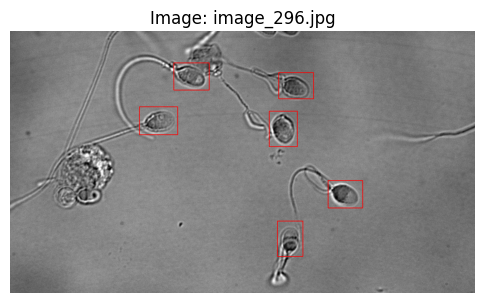

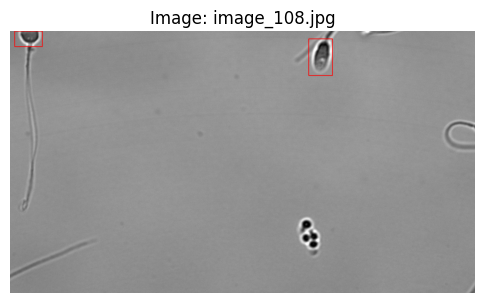

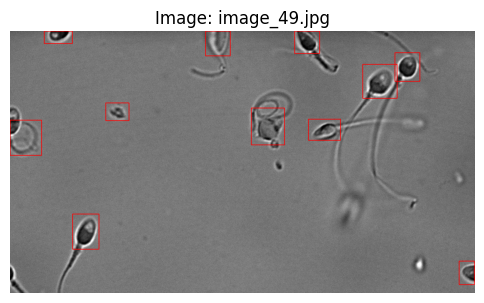

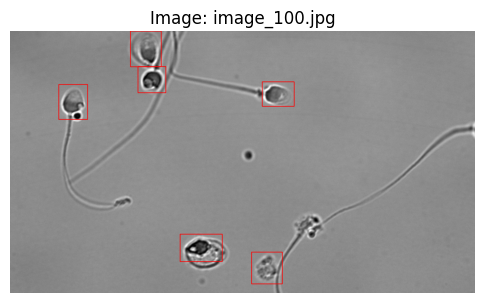

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

# Paths
image_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/val'
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_val_predictions.csv'

# Read CSV
df = pd.read_csv(csv_path)

# List of specific image filenames to display
selected_images = ['image_296.jpg', 'image_108.jpg', 'image_49.jpg','image_100.jpg']

# Display each selected image with bounding boxes
for img_name in selected_images:
    img_path = os.path.join(image_dir, img_name)
    image = cv2.imread(img_path)
    if image is None:
        print(f"Image not found: {img_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Filter the bounding boxes for the current image
    boxes = df[df['image'] == img_name]

    # Draw bounding boxes
    for _, row in boxes.iterrows():
        x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)

    # Show the image with boxes
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Image: {img_name}")
    plt.axis('off')
    plt.show()


In [21]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# === CONFIG ===
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_train_predictions.csv'              # CSV file with YOLO predictions
images_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/train'           # Folder where original images are stored
output_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/cropped_images_yolo'                  # Folder to save cropped images
os.makedirs(output_dir, exist_ok=True)

# === LOAD CSV ===
df = pd.read_csv(csv_path)

# === CROP AND SAVE ===
for idx, row in tqdm(df.iterrows(), total=len(df), desc='Cropping images'):
    image_path = os.path.join(images_dir, row['image'])

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Could not read {image_path}")
        continue

    # Get box coordinates
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])

    # Crop the region
    crop = image[ymin:ymax, xmin:xmax]

    # Build a unique filename for each crop
    base_name = os.path.splitext(row['image'])[0]
    crop_name = f"{base_name}_{idx}.jpg"
    crop_path = os.path.join(output_dir, crop_name)

    # Save cropped image
    cv2.imwrite(crop_path, crop)

print(f"Saved all cropped images to: {output_dir}")


Cropping images: 100%|██████████| 1884/1884 [00:49<00:00, 38.09it/s]

Saved all cropped images to: /content/drive/MyDrive/data_images/yolo_dataset/images/cropped_images_yolo


In [22]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# === CONFIG ===
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_val_predictions.csv'              # CSV file with YOLO predictions
images_dir = '/content/drive/MyDrive/data_images/yolo_dataset/images/val'           # Folder where original images are stored
output_dir = '/content/drive/MyDrive/data_images/csv/yolo/crop_yolo_val'                  # Folder to save cropped images
os.makedirs(output_dir, exist_ok=True)

# === LOAD CSV ===
df = pd.read_csv(csv_path)

# === CROP AND SAVE ===
for idx, row in tqdm(df.iterrows(), total=len(df), desc='Cropping images'):
    image_path = os.path.join(images_dir, row['image'])

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Could not read {image_path}")
        continue

    # Get box coordinates
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])

    # Crop the region
    crop = image[ymin:ymax, xmin:xmax]

    # Build a unique filename for each crop
    base_name = os.path.splitext(row['image'])[0]
    crop_name = f"{base_name}_{idx}.jpg"
    crop_path = os.path.join(output_dir, crop_name)

    # Save cropped image
    cv2.imwrite(crop_path, crop)

print(f"Saved all cropped images to: {output_dir}")


Cropping images: 100%|██████████| 504/504 [04:36<00:00,  1.82it/s]

Saved all cropped images to: /content/drive/MyDrive/data_images/csv/yolo/crop_yolo_val


In [23]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
base_dir = '/content/drive/MyDrive/data_images/yolo_dataset'  # Base path for images
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_train_predictions.csv'  # CSV file path
output_dir = '/content/drive/MyDrive/data_images/yolo_dataset'  # Output directory path

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Read CSV annotations
annotations = pd.read_csv(csv_path)

# List to store results
dfi_values = []

# Loop through each annotation
for idx, row in annotations.iterrows():
    image_name, xmin, ymin, xmax, ymax = row['image'], row['xmin'], row['ymin'], row['xmax'], row['ymax']

    # Remove underscore from image name (e.g., image_1 → image1)
    image_name = image_name.replace('_', '')

    # Remove file extension if present
    image_name = os.path.splitext(image_name)[0]

    # Build paths with correct capitalization in folder names
    green_train_path = os.path.join(base_dir, 'Green', 'train', f"{image_name}.jpg")
    red_train_path = os.path.join(base_dir, 'Red', 'train', f"{image_name}.jpg")

    green_val_path = os.path.join(base_dir, 'Green', 'val', f"{image_name}.jpg")
    red_val_path = os.path.join(base_dir, 'Red', 'val', f"{image_name}.jpg")

    print(f"Looking for:\n  Green Train Path: {green_train_path}\n  Red Train Path: {red_train_path}")
    print(f"  Green Val Path: {green_val_path}\n  Red Val Path: {red_val_path}")

    # Check if files exist in train or val
    if os.path.exists(green_train_path) and os.path.exists(red_train_path):
        green_image_path = green_train_path
        red_image_path = red_train_path
        dataset = 'train'
    elif os.path.exists(green_val_path) and os.path.exists(red_val_path):
        green_image_path = green_val_path
        red_image_path = red_val_path
        dataset = 'val'
    else:
        print(f"❌ Image pair not found for {image_name}")
        continue

    # Load images in grayscale
    green_image = cv2.imread(green_image_path, cv2.IMREAD_GRAYSCALE)
    red_image = cv2.imread(red_image_path, cv2.IMREAD_GRAYSCALE)

    if green_image is None or red_image is None:
        print(f"❌ Failed to load images for {image_name}")
        continue

    # Convert coordinates to int (slice indices must be integers)
    xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

    # Crop the region of interest
    green_crop = green_image[ymin:ymax, xmin:xmax]
    red_crop = red_image[ymin:ymax, xmin:xmax]

    # Sum pixel intensities in cropped region
    green_sum = np.sum(green_crop)
    red_sum = np.sum(red_crop)

    # Calculate DFI (avoid division by zero)
    dfi = (red_sum / (green_sum + red_sum)) if (green_sum + red_sum) > 0 else 0

    # Store results
    dfi_values.append((image_name, xmin, ymin, xmax, ymax, dfi, dataset))
    print(f"✅ Processed {image_name} in {dataset}: DFI = {dfi:.3f}")

# Save results to CSV
dfi_df = pd.DataFrame(dfi_values, columns=['Image Name', 'xmin', 'ymin', 'xmax', 'ymax', 'DFI', 'Dataset'])
dfi_df.to_csv(os.path.join(output_dir, 'DFI_results_yolo.csv'), index=False)

print("\nDFI calculation completed and saved to DFI_results.csv")


Streaming output truncated to the last 5000 lines.
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image295.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/train/image295.jpg
  Green Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/val/image295.jpg
  Red Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/val/image295.jpg
✅ Processed image295 in train: DFI = 0.336
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image295.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/train/image295.jpg
  Green Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/val/image295.jpg
  Red Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/val/image295.jpg
✅ Processed image295 in train: DFI = 0.210
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image297.jpg
  Red Train Path: /

In [24]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
base_dir = '/content/drive/MyDrive/data_images/yolo_dataset'  # Base path for images
csv_path = '/content/drive/MyDrive/data_images/yolo_dataset/images/yolo_val_predictions.csv'  # CSV file path
output_dir = '/content/drive/MyDrive/data_images/yolo_dataset'  # Output directory path

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Read CSV annotations
annotations = pd.read_csv(csv_path)

# List to store results
dfi_values = []

# Loop through each annotation
for idx, row in annotations.iterrows():
    image_name, xmin, ymin, xmax, ymax = row['image'], row['xmin'], row['ymin'], row['xmax'], row['ymax']

    # Remove underscore from image name (e.g., image_1 → image1)
    image_name = image_name.replace('_', '')

    # Remove file extension if present
    image_name = os.path.splitext(image_name)[0]

    # Build paths with correct capitalization in folder names
    green_train_path = os.path.join(base_dir, 'Green', 'train', f"{image_name}.jpg")
    red_train_path = os.path.join(base_dir, 'Red', 'train', f"{image_name}.jpg")

    green_val_path = os.path.join(base_dir, 'Green', 'val', f"{image_name}.jpg")
    red_val_path = os.path.join(base_dir, 'Red', 'val', f"{image_name}.jpg")

    print(f"Looking for:\n  Green Train Path: {green_train_path}\n  Red Train Path: {red_train_path}")
    print(f"  Green Val Path: {green_val_path}\n  Red Val Path: {red_val_path}")

    # Check if files exist in train or val
    if os.path.exists(green_train_path) and os.path.exists(red_train_path):
        green_image_path = green_train_path
        red_image_path = red_train_path
        dataset = 'train'
    elif os.path.exists(green_val_path) and os.path.exists(red_val_path):
        green_image_path = green_val_path
        red_image_path = red_val_path
        dataset = 'val'
    else:
        print(f"❌ Image pair not found for {image_name}")
        continue

    # Load images in grayscale
    green_image = cv2.imread(green_image_path, cv2.IMREAD_GRAYSCALE)
    red_image = cv2.imread(red_image_path, cv2.IMREAD_GRAYSCALE)

    if green_image is None or red_image is None:
        print(f"❌ Failed to load images for {image_name}")
        continue

    # Convert coordinates to int (slice indices must be integers)
    xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

    # Crop the region of interest
    green_crop = green_image[ymin:ymax, xmin:xmax]
    red_crop = red_image[ymin:ymax, xmin:xmax]

    # Sum pixel intensities in cropped region
    green_sum = np.sum(green_crop)
    red_sum = np.sum(red_crop)

    # Calculate DFI (avoid division by zero)
    dfi = (red_sum / (green_sum + red_sum)) if (green_sum + red_sum) > 0 else 0

    # Store results
    dfi_values.append((image_name, xmin, ymin, xmax, ymax, dfi, dataset))
    print(f"✅ Processed {image_name} in {dataset}: DFI = {dfi:.3f}")

# Save results to CSV
dfi_df = pd.DataFrame(dfi_values, columns=['Image Name', 'xmin', 'ymin', 'xmax', 'ymax', 'DFI', 'Dataset'])
dfi_df.to_csv(os.path.join(output_dir, 'DFI_results_yolo_val.csv'), index=False)

print("\nDFI calculation completed and saved to DFI_results.csv")


Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image100.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/train/image100.jpg
  Green Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/val/image100.jpg
  Red Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/val/image100.jpg
✅ Processed image100 in val: DFI = 0.398
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image100.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/train/image100.jpg
  Green Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/val/image100.jpg
  Red Val Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/val/image100.jpg
✅ Processed image100 in val: DFI = 0.231
Looking for:
  Green Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Green/train/image100.jpg
  Red Train Path: /content/drive/MyDrive/data_images/yolo_dataset/Red/trai

In [25]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from tqdm import tqdm

import torch
import timm
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models

# For EfficientNet
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet


  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=353ee0441448926c2734ba0648f7238e3ac1bc0f30c5073ae2cd77b6d2950414
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch


In [26]:
import pandas as pd

# --- File paths ---
input_csv = '/content/drive/MyDrive/data_images/yolo_dataset/DFI_results_all.csv'         # Input CSV file with a 'Dataset' column
train_csv = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'         # Output CSV for training data
val_csv = '/content/drive/MyDrive/data_images/csv/yolo_sam/val_all.csv'             # Output CSV for validation data

# --- Read the input CSV ---
df = pd.read_csv(input_csv)

# --- Check if 'Dataset' column exists ---
if 'Dataset' not in df.columns:
    raise ValueError("❌ The 'Dataset' column is missing from the input CSV!")

# --- Filter rows for training and validation ---
train_df = df[df['Dataset'].str.lower() == 'train']
val_df = df[df['Dataset'].str.lower() == 'val']

# --- Save to separate CSV files ---
train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)

print(f"✅ Saved {len(train_df)} training rows to: {train_csv}")
print(f"✅ Saved {len(val_df)} validation rows to: {val_csv}")


✅ Saved 1775 training rows to: /content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv
✅ Saved 450 validation rows to: /content/drive/MyDrive/data_images/csv/yolo_sam/val_all.csv


In [27]:
import pandas as pd
import re
import os

# === Paths ===
csv_path = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
output_csv_path = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'

# === Load CSV ===
df = pd.read_csv(csv_path)

# Convert "image1" to "image_1"
df['Image Name'] = df['Image Name'].apply(lambda x: re.sub(r'^image(\d+)', r'image_\1', x))

# Add a sub-index to create unique names like image_1_0, image_1_1, ...
df['sub_index'] = df.groupby('Image Name').cumcount()

# Create a new column with the new image names
df['Image Name'] = df['Image Name'] + '_' + df['sub_index'].astype(str) + '.jpg'

# Save updated CSV
df.to_csv(output_csv_path, index=False)

print(f"✅ Image names updated and saved to: {output_csv_path}")


✅ Image names updated and saved to: /content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv


In [31]:
import pandas as pd

# Path to your CSV file
csv_path = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val_1.csv'
df = pd.read_csv(csv_path)

# Add a global counter
df.reset_index(inplace=True)
df['filename'] = df.apply(lambda row: f"{row['Image Name']}.jpg", axis=1)

# Drop the temporary index column
df.drop(columns=['index'], inplace=True)

# Save the modified CSV (optional)
df.to_csv('/content/drive/MyDrive/data_images/csv/yoloDFI_results_yolo_val_1.csv', index=False)

print("Image names updated successfully.")


Image names updated successfully.


In [36]:
import pandas as pd
import os
import re

# === Paths ===
csv_path_train = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
csv_path_val = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val_1.csv'
train_dir = '/content/drive/MyDrive/data_images/csv/yolo_sam/train'
val_dir = '/content/drive/MyDrive/data_images/csv/yolo/crop_yolo_val'

# === Function to find actual image file with any common extension ===
def find_existing_filename(base_name, folder_path):
    for ext in ['.jpg', '.jpeg', '.png']:
        candidate = os.path.join(folder_path, base_name + ext)
        if os.path.isfile(candidate):
            return os.path.basename(candidate)
    return None

# === Function to filter dataframe by actual existing files ===
def filter_existing_images_dynamic(df_subset, folder_path):
    valid_rows = []
    for idx, row in df_subset.iterrows():
        # Example fix: 'image1_0' -> 'image_1_0'
        base = re.sub(r'^image(\d+)', r'image_\1', row['Image Name'])
        actual_name = find_existing_filename(base, folder_path)
        if actual_name:
            row['filename'] = actual_name  # Add actual filename column
            valid_rows.append(row)
        else:
            print(f"Warning: Image not found for base name '{base}' in {folder_path}")
    return pd.DataFrame(valid_rows)

# === Process train CSV ===
df_train = pd.read_csv(csv_path_train)
df_train_filtered = filter_existing_images_dynamic(df_train, train_dir)
train_csv_out = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
df_train_filtered.to_csv(train_csv_out, index=False)

# === Process val CSV ===
df_val = pd.read_csv(csv_path_val)
df_val_filtered = filter_existing_images_dynamic(df_val, val_dir)
val_csv_out = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val.csv'
df_val_filtered.to_csv(val_csv_out, index=False)

# === Final Output ===
print(f"Filtered Train samples: {len(df_train_filtered)} -> Saved to {train_csv_out}")
print(f"Filtered Val samples: {len(df_val_filtered)}   -> Saved to {val_csv_out}")

# === Preview ===
print("\nSample filtered train rows:")
print(df_train_filtered.head())

print("\nSample filtered val rows:")
print(df_val_filtered.head())


Filtered Train samples: 0 -> Saved to /content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv
Filtered Val samples: 402   -> Saved to /content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val.csv

Sample filtered train rows:
Empty DataFrame
Columns: []
Index: []

Sample filtered val rows:
   Image Name  xmin  ymin  xmax  ymax       DFI Dataset         filename  \
0  image100_0   205   222   317   365  0.397795     val  image_100_0.jpg   
1  image100_1  1040   211  1169   313  0.223206     val  image_100_1.jpg   
2  image100_2   530   147   645   262  0.397238     val  image_100_2.jpg   
3  image100_3   497     0   624   152  0.386313     val  image_100_3.jpg   
4  image100_4   704   839   858   944  0.483214     val  image_100_4.jpg   

  dfi_class  
0      high  
1      high  
2      high  
3      high  
4      high  


In [40]:
import pandas as pd
import re

# Load CSV
csv_path = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
df = pd.read_csv(csv_path)

# Ensure 'filename' column exists
if 'filename' not in df.columns:
   def fix_filename(name):
    fixed = re.sub(r'^image(\d+)', r'image_\1', name)
    if not fixed.endswith('.jpg'):
        fixed += '.jpg'
    return fixed
df['filename'] = df['Image Name']


# Create binary DFI classification (low < 0.1, high > 0.15)
def classify_dfi(dfi):
    try:
        dfi = float(dfi)
    except:
        return None
    if dfi < 0.08:
        return 'low'
    elif dfi > 0.11:
        return 'high'
    else:
        return None  # discard values between 0.1 and 0.15

# Apply classification and drop intermediate values
df['dfi_class'] = df['DFI'].apply(classify_dfi)
df = df.dropna(subset=['dfi_class'])

# Separate train and val sets
df_train = df[df['Dataset'] == 'train']
df_val = df[df['Dataset'] == 'val']

# Count samples per class for train
train_counts = df_train['dfi_class'].value_counts()
print("✅ Number of samples per DFI class in TRAIN set:")
print(train_counts)

print("\n---------------------------\n")

# Count samples per class for val
val_counts = df_val['dfi_class'].value_counts()
print("✅ Number of samples per DFI class in VAL set:")
print(val_counts)

# Optional: Save the updated CSV
updated_csv_path = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
df.to_csv(updated_csv_path, index=False)


✅ Number of samples per DFI class in TRAIN set:
dfi_class
low     714
high    549
Name: count, dtype: int64

---------------------------

✅ Number of samples per DFI class in VAL set:
Series([], Name: count, dtype: int64)


In [41]:
import pandas as pd
import re

# Load CSV
csv_path = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val_1.csv'
df = pd.read_csv(csv_path)

# Ensure 'filename' column exists
if 'filename' not in df.columns:
   def fix_filename(name):
    fixed = re.sub(r'^image(\d+)', r'image_\1', name)
    if not fixed.endswith('.jpg'):
        fixed += '.jpg'
    return fixed
df['filename'] = df['Image Name']


# Create binary DFI classification (low < 0.1, high > 0.15)
def classify_dfi(dfi):
    try:
        dfi = float(dfi)
    except:
        return None
    if dfi < 0.08:
        return 'low'
    elif dfi > 0.11:
        return 'high'
    else:
        return None  # discard values between 0.1 and 0.15

# Apply classification and drop intermediate values
df['dfi_class'] = df['DFI'].apply(classify_dfi)
df = df.dropna(subset=['dfi_class'])

# Separate train and val sets
df_train = df[df['Dataset'] == 'train']
df_val = df[df['Dataset'] == 'val']

# Count samples per class for train
train_counts = df_train['dfi_class'].value_counts()
print("✅ Number of samples per DFI class in TRAIN set:")
print(train_counts)

print("\n---------------------------\n")

# Count samples per class for val
val_counts = df_val['dfi_class'].value_counts()
print("✅ Number of samples per DFI class in VAL set:")
print(val_counts)

# Optional: Save the updated CSV
updated_csv_path = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val_1.csv'
df.to_csv(updated_csv_path, index=False)


✅ Number of samples per DFI class in TRAIN set:
Series([], Name: count, dtype: int64)

---------------------------

✅ Number of samples per DFI class in VAL set:
dfi_class
high    224
low     178
Name: count, dtype: int64


In [42]:
import pandas as pd

# Load the CSV
csv_path = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val_1.csv'
df = pd.read_csv(csv_path)

# Clean column names (remove accidental whitespaces)
df.columns = df.columns.str.strip()

# Fix the filename format: insert '_' after 'image' and append '.jpg'
df['filename'] = df['Image Name'].apply(lambda x: x.replace('image', 'image_') + '.jpg')

# Save the corrected CSV
df.to_csv(csv_path, index=False)

print("Filenames corrected to match actual images (image_###_# format + .jpg)")


Filenames corrected to match actual images (image_###_# format + .jpg)


In [43]:
# Paths to CSVs and image directories
train_csv_path = '/content/drive/MyDrive/data_images/csv/yolo_sam/train_all.csv'
val_csv_path = '/content/drive/MyDrive/data_images/csv/yolo/DFI_results_yolo_val_1.csv'
train_img_dir = '/content/drive/MyDrive/data_images/csv/yolo_sam/train'
val_img_dir = '/content/drive/MyDrive/data_images/csv/yolo/crop_yolo_val'

# Load dataframes
df_train = pd.read_csv(train_csv_path)
df_val = pd.read_csv(val_csv_path)

In [44]:
import random
# Set seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(42)


In [45]:
# Dataset class
class DfiDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform
        self.label_map = {'low': 0,'high': 1}
        self.df['label'] = self.df['dfi_class'].map(self.label_map)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['filename'])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, row['label']


In [46]:
# Hyperparameters
dropout_rate = 0.6
batch_size = 32
num_epochs = 100
learning_rate = 1e-4
weight_decay = 1e-4  # for optimizer regularization
early_stopping_patience = 10


In [47]:
# Data augmentation and normalization
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [48]:
# Create datasets and dataloaders
train_dataset = DfiDataset(df_train, train_img_dir, transform=train_transform)
val_dataset = DfiDataset(df_val, val_img_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [49]:
# Extract all labels from the training loader
labels_train = []

for _, labels in train_loader:
    labels_train.extend(labels.numpy())  # or labels.cpu().numpy() if on GPU


In [50]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from efficientnet_pytorch import EfficientNet
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
dropout_rate = 0.6
learning_rate = 1e-4
weight_decay = 1e-5
num_epochs = 100
early_stopping_patience = 20
num_classes = 2

# Define EfficientNet-B0 model with dropout
class EfficientNetB0Classifier(nn.Module):
    def __init__(self, dropout_rate=0.6, num_classes=2):
        super().__init__()
        self.base_model = EfficientNet.from_pretrained('efficientnet-b0')
        in_features = self.base_model._fc.in_features
        self.base_model._fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

model = EfficientNetB0Classifier(dropout_rate=dropout_rate, num_classes=num_classes).to(device)

# Compute class weights from training labels (labels_train must be provided)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels_train), y=labels_train)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=20, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss >= self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=early_stopping_patience, verbose=True)

# Training epoch
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return epoch_loss, acc, prec, rec, f1

# Validation epoch
def validate_epoch(model, loader, criterion):
    model.eval()
    running_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return epoch_loss, acc, prec, rec, f1

# Metric lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
train_precisions, val_precisions = [], []
train_recalls, val_recalls = [], []
train_f1s, val_f1s = [], []

# Training loop
best_val_loss = float('inf')

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc, train_prec, train_rec, train_f1 = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc, val_prec, val_rec, val_f1 = validate_epoch(model, val_loader, criterion)

    print(f"Epoch {epoch} | Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train - Acc: {train_acc:.4f}, Prec: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
    print(f"Val   - Acc: {val_acc:.4f}, Prec: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"✔️ Best model saved at epoch {epoch} with val_loss: {val_loss:.4f}")

    # Append metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_precisions.append(train_prec)
    val_precisions.append(val_prec)
    train_recalls.append(train_rec)
    val_recalls.append(val_rec)
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)

    # Scheduler and early stopping
    scheduler.step(val_loss)
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("⏹️ Early stopping triggered.")
        break


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 136MB/s]


Loaded pretrained weights for efficientnet-b0


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or 

Epoch 1 | Train Loss: 0.6273, Val Loss: 0.6641
Train - Acc: 0.6532, Prec: 0.6580, Recall: 0.6532, F1: 0.6545
Val   - Acc: 0.6070, Prec: 0.6035, Recall: 0.6070, F1: 0.5854
✔️ Best model saved at epoch 1 with val_loss: 0.6641


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2 | Train Loss: 0.5275, Val Loss: 0.6258
Train - Acc: 0.7458, Prec: 0.7506, Recall: 0.7458, F1: 0.7468
Val   - Acc: 0.6517, Prec: 0.6669, Recall: 0.6517, F1: 0.6243
✔️ Best model saved at epoch 2 with val_loss: 0.6258


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3 | Train Loss: 0.4888, Val Loss: 0.5684
Train - Acc: 0.7902, Prec: 0.7961, Recall: 0.7902, F1: 0.7910
Val   - Acc: 0.7114, Prec: 0.7294, Recall: 0.7114, F1: 0.6956
✔️ Best model saved at epoch 3 with val_loss: 0.5684


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4 | Train Loss: 0.4620, Val Loss: 0.5581
Train - Acc: 0.7878, Prec: 0.7907, Recall: 0.7878, F1: 0.7885
Val   - Acc: 0.7090, Prec: 0.7470, Recall: 0.7090, F1: 0.6846
✔️ Best model saved at epoch 4 with val_loss: 0.5581


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5 | Train Loss: 0.4376, Val Loss: 0.5947
Train - Acc: 0.8108, Prec: 0.8121, Recall: 0.8108, F1: 0.8112
Val   - Acc: 0.6617, Prec: 0.7139, Recall: 0.6617, F1: 0.6179
EarlyStopping counter: 1 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 6 | Train Loss: 0.4348, Val Loss: 0.5482
Train - Acc: 0.8029, Prec: 0.8065, Recall: 0.8029, F1: 0.8035
Val   - Acc: 0.7090, Prec: 0.7499, Recall: 0.7090, F1: 0.6836
✔️ Best model saved at epoch 6 with val_loss: 0.5482


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 7 | Train Loss: 0.3954, Val Loss: 0.5043
Train - Acc: 0.8290, Prec: 0.8311, Recall: 0.8290, F1: 0.8295
Val   - Acc: 0.7612, Prec: 0.7747, Recall: 0.7612, F1: 0.7527
✔️ Best model saved at epoch 7 with val_loss: 0.5043


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 8 | Train Loss: 0.3825, Val Loss: 0.4960
Train - Acc: 0.8298, Prec: 0.8317, Recall: 0.8298, F1: 0.8302
Val   - Acc: 0.7761, Prec: 0.7817, Recall: 0.7761, F1: 0.7715
✔️ Best model saved at epoch 8 with val_loss: 0.4960


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 9 | Train Loss: 0.3493, Val Loss: 0.5195
Train - Acc: 0.8488, Prec: 0.8487, Recall: 0.8488, F1: 0.8487
Val   - Acc: 0.7711, Prec: 0.7755, Recall: 0.7711, F1: 0.7668
EarlyStopping counter: 1 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 10 | Train Loss: 0.3421, Val Loss: 0.5343
Train - Acc: 0.8448, Prec: 0.8477, Recall: 0.8448, F1: 0.8453
Val   - Acc: 0.7612, Prec: 0.7696, Recall: 0.7612, F1: 0.7546
EarlyStopping counter: 2 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 11 | Train Loss: 0.3108, Val Loss: 0.5740
Train - Acc: 0.8694, Prec: 0.8702, Recall: 0.8694, F1: 0.8696
Val   - Acc: 0.7562, Prec: 0.7721, Recall: 0.7562, F1: 0.7465
EarlyStopping counter: 3 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 12 | Train Loss: 0.2943, Val Loss: 0.5517
Train - Acc: 0.8789, Prec: 0.8790, Recall: 0.8789, F1: 0.8789
Val   - Acc: 0.7687, Prec: 0.7796, Recall: 0.7687, F1: 0.7616
EarlyStopping counter: 4 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 13 | Train Loss: 0.2656, Val Loss: 0.5283
Train - Acc: 0.8955, Prec: 0.8959, Recall: 0.8955, F1: 0.8956
Val   - Acc: 0.7935, Prec: 0.7934, Recall: 0.7935, F1: 0.7923
EarlyStopping counter: 5 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 14 | Train Loss: 0.2594, Val Loss: 0.5197
Train - Acc: 0.8923, Prec: 0.8928, Recall: 0.8923, F1: 0.8925
Val   - Acc: 0.7985, Prec: 0.7990, Recall: 0.7985, F1: 0.7969
EarlyStopping counter: 6 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 15 | Train Loss: 0.2583, Val Loss: 0.5229
Train - Acc: 0.8907, Prec: 0.8911, Recall: 0.8907, F1: 0.8908
Val   - Acc: 0.8159, Prec: 0.8158, Recall: 0.8159, F1: 0.8151
EarlyStopping counter: 7 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 16 | Train Loss: 0.2514, Val Loss: 0.5633
Train - Acc: 0.8979, Prec: 0.8979, Recall: 0.8979, F1: 0.8979
Val   - Acc: 0.7811, Prec: 0.7849, Recall: 0.7811, F1: 0.7817
EarlyStopping counter: 8 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 17 | Train Loss: 0.2023, Val Loss: 0.5554
Train - Acc: 0.9121, Prec: 0.9121, Recall: 0.9121, F1: 0.9121
Val   - Acc: 0.7985, Prec: 0.8013, Recall: 0.7985, F1: 0.7990
EarlyStopping counter: 9 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 18 | Train Loss: 0.2096, Val Loss: 0.5675
Train - Acc: 0.9216, Prec: 0.9220, Recall: 0.9216, F1: 0.9217
Val   - Acc: 0.7886, Prec: 0.7960, Recall: 0.7886, F1: 0.7892
EarlyStopping counter: 10 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 19 | Train Loss: 0.2016, Val Loss: 0.5923
Train - Acc: 0.9232, Prec: 0.9233, Recall: 0.9232, F1: 0.9232
Val   - Acc: 0.8010, Prec: 0.8148, Recall: 0.8010, F1: 0.8014
EarlyStopping counter: 11 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 20 | Train Loss: 0.2052, Val Loss: 0.5739
Train - Acc: 0.9129, Prec: 0.9131, Recall: 0.9129, F1: 0.9130
Val   - Acc: 0.8134, Prec: 0.8220, Recall: 0.8134, F1: 0.8140
EarlyStopping counter: 12 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 21 | Train Loss: 0.1860, Val Loss: 0.5805
Train - Acc: 0.9248, Prec: 0.9250, Recall: 0.9248, F1: 0.9248
Val   - Acc: 0.8159, Prec: 0.8273, Recall: 0.8159, F1: 0.8164
EarlyStopping counter: 13 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 22 | Train Loss: 0.1829, Val Loss: 0.5774
Train - Acc: 0.9311, Prec: 0.9313, Recall: 0.9311, F1: 0.9312
Val   - Acc: 0.8209, Prec: 0.8300, Recall: 0.8209, F1: 0.8215
EarlyStopping counter: 14 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 23 | Train Loss: 0.1858, Val Loss: 0.5715
Train - Acc: 0.9272, Prec: 0.9272, Recall: 0.9272, F1: 0.9272
Val   - Acc: 0.8234, Prec: 0.8282, Recall: 0.8234, F1: 0.8239
EarlyStopping counter: 15 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 24 | Train Loss: 0.1673, Val Loss: 0.5560
Train - Acc: 0.9398, Prec: 0.9401, Recall: 0.9398, F1: 0.9399
Val   - Acc: 0.8234, Prec: 0.8290, Recall: 0.8234, F1: 0.8240
EarlyStopping counter: 16 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 25 | Train Loss: 0.1921, Val Loss: 0.5548
Train - Acc: 0.9224, Prec: 0.9224, Recall: 0.9224, F1: 0.9224
Val   - Acc: 0.8234, Prec: 0.8282, Recall: 0.8234, F1: 0.8239
EarlyStopping counter: 17 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 26 | Train Loss: 0.1654, Val Loss: 0.5604
Train - Acc: 0.9359, Prec: 0.9361, Recall: 0.9359, F1: 0.9359
Val   - Acc: 0.8184, Prec: 0.8232, Recall: 0.8184, F1: 0.8190
EarlyStopping counter: 18 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 27 | Train Loss: 0.1857, Val Loss: 0.5590
Train - Acc: 0.9232, Prec: 0.9233, Recall: 0.9232, F1: 0.9232
Val   - Acc: 0.8209, Prec: 0.8261, Recall: 0.8209, F1: 0.8215
EarlyStopping counter: 19 out of 20


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 28 | Train Loss: 0.1734, Val Loss: 0.5570
Train - Acc: 0.9279, Prec: 0.9279, Recall: 0.9279, F1: 0.9279
Val   - Acc: 0.8184, Prec: 0.8232, Recall: 0.8184, F1: 0.8190
EarlyStopping counter: 20 out of 20
⏹️ Early stopping triggered.


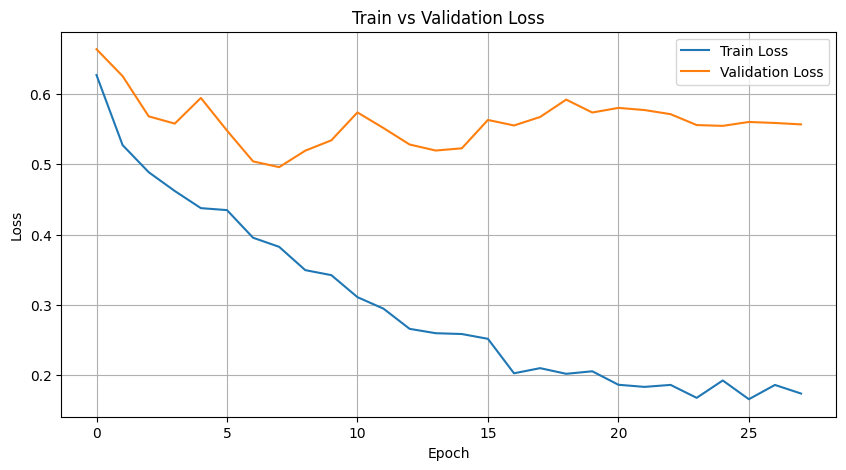


📊 Metrics per Epoch:
    Epoch  Train Acc  Val Acc  Train Prec  Val Prec  Train Recall  Val Recall  \
0       1     0.6532   0.6070      0.6580    0.6035        0.6532      0.6070   
1       2     0.7458   0.6517      0.7506    0.6669        0.7458      0.6517   
2       3     0.7902   0.7114      0.7961    0.7294        0.7902      0.7114   
3       4     0.7878   0.7090      0.7907    0.7470        0.7878      0.7090   
4       5     0.8108   0.6617      0.8121    0.7139        0.8108      0.6617   
5       6     0.8029   0.7090      0.8065    0.7499        0.8029      0.7090   
6       7     0.8290   0.7612      0.8311    0.7747        0.8290      0.7612   
7       8     0.8298   0.7761      0.8317    0.7817        0.8298      0.7761   
8       9     0.8488   0.7711      0.8487    0.7755        0.8488      0.7711   
9      10     0.8448   0.7612      0.8477    0.7696        0.8448      0.7612   
10     11     0.8694   0.7562      0.8702    0.7721        0.8694      0.7562   
11    

In [51]:
import matplotlib.pyplot as plt
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Metrics Table
results_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses) + 1)),
    'Train Acc': train_accuracies,
    'Val Acc': val_accuracies,
    'Train Prec': train_precisions,
    'Val Prec': val_precisions,
    'Train Recall': train_recalls,
    'Val Recall': val_recalls,
    'Train F1': train_f1s,
    'Val F1': val_f1s
})
print("\n📊 Metrics per Epoch:")
print(results_df.round(4))
results_df.to_csv('/content/metrics_summary.csv', index=False)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


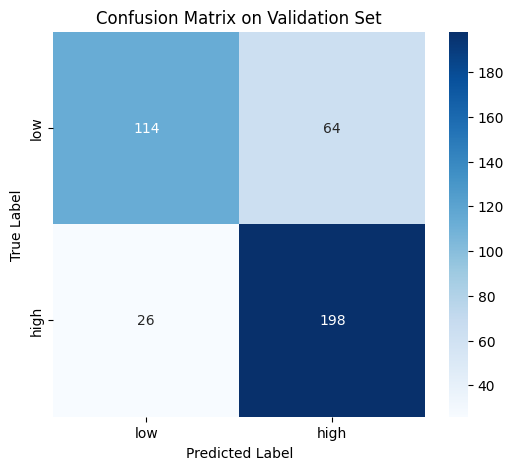

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Load best model weights
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)

# Function to get predictions and true labels from the dataloader
def get_preds_and_labels(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    return all_preds, all_labels

# Get predictions and true labels from validation set
val_preds, val_labels = get_preds_and_labels(model, val_loader, device)

# Define class names (adjust if you have only 2 classes)
class_names = ['low', 'high']  # or ['low', 'medium', 'high']

# Compute confusion matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Validation Set")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


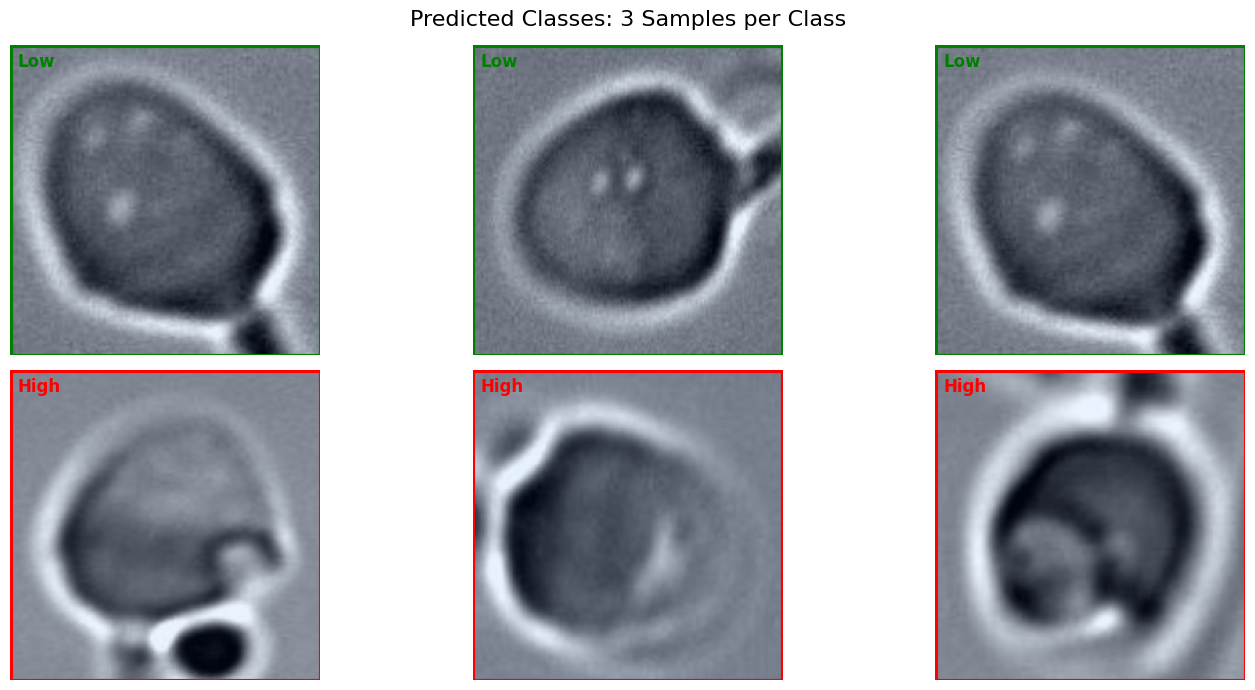

In [53]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from collections import defaultdict

# Load best model weights
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)
model.eval()

# Mapping for class labels and colors
dfi_labels = {0: "Low", 1: "High"}
dfi_colors = {0: 'green', 1: 'red'}

# Storage for class-wise samples
class_samples = defaultdict(list)

# Gather samples until we have 3 for each class
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        labels = labels.cpu().numpy()
        for img, pred in zip(images.cpu(), preds):
            if len(class_samples[pred]) < 3:
                class_samples[pred].append(img)
        if all(len(class_samples[c]) >= 3 for c in dfi_labels):
            break

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 7))  # 2 rows (Low & High), 3 samples each
axes = axes.flatten()

idx = 0
for class_id in sorted(dfi_labels.keys()):
    for img in class_samples[class_id]:
        image = img.permute(1, 2, 0).numpy()
        image = (image - image.min()) / (image.max() - image.min())

        color = dfi_colors[class_id]
        label_text = f"{dfi_labels[class_id]}"

        axes[idx].imshow(image)
        axes[idx].add_patch(plt.Rectangle((0, 0), image.shape[1], image.shape[0],
                                          edgecolor=color, facecolor='none', linewidth=3))
        axes[idx].text(5, 15, label_text, color=color, fontsize=12, weight='bold')
        axes[idx].axis('off')
        idx += 1

plt.suptitle("Predicted Classes: 3 Samples per Class", fontsize=16)
plt.tight_layout()
plt.show()
